In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.21, 0.1], [0.1, 1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

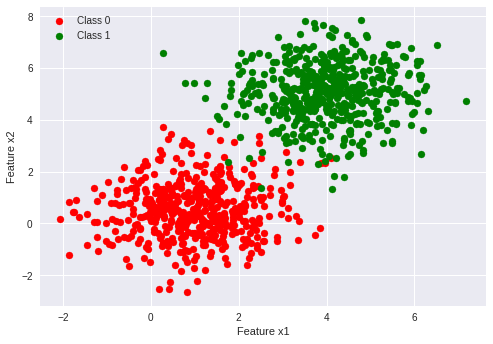

In [3]:
plt.style.use('seaborn')
plt.scatter(dist_01[:, 0], dist_01[:, 1], color = 'red', label = 'Class 0')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'green', label = 'Class 1')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [4]:
m = dist_01.shape[0] + dist_02.shape[0]
n = dist_01.shape[1]
data = np.zeros((m, n + 1))
data[:500, :2] = dist_01
data[500:, :2] = dist_02
data[500:, -1] = 1
# data[:500, -1] = 0
print(data.shape)

(1000, 3)


In [5]:
np.random.shuffle(data)
print(data[:10])

[[3.91546008 6.474363   1.        ]
 [0.23585473 0.37722437 0.        ]
 [3.43652949 4.31257954 1.        ]
 [2.54955398 1.03572759 0.        ]
 [4.39174361 3.21960346 1.        ]
 [2.67570089 6.49804389 1.        ]
 [4.55649734 4.12952237 1.        ]
 [0.10754622 0.65089322 0.        ]
 [1.08244987 0.27970874 0.        ]
 [2.83163719 2.11572332 0.        ]]


In [6]:
split = int(0.8 * data.shape[0])

X_train = data[:split, :-1]
Y_train = data[:split, -1]
X_test = data[split:, :-1]
Y_test = data[split:, -1]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


In [7]:
model = LogisticRegression()

In [8]:
model.fit(X_train, Y_train)

LogisticRegression()

In [9]:
theta_0 = model.intercept_

In [10]:
theta_s = model.coef_

In [11]:
print(theta_0, theta_s)

[-10.86584006] [[1.53571466 2.42770232]]


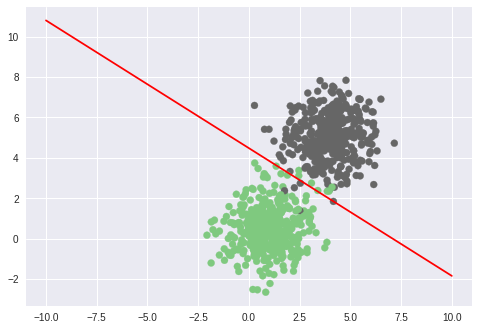

In [12]:
x1 = np.linspace(-10, 10, 50)
x2 = -(theta_0 + theta_s[0, 0] * x1) / theta_s[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1, 1)), cmap = plt.cm.Accent)
plt.plot(x1, x2, color = 'red')
plt.show()

In [13]:
model.score(X_train, Y_train)

0.985

In [14]:
model.score(X_test, Y_test)

0.99

In [15]:
Y_pred = model.predict(X_test)

In [16]:
Y_pred[:5]

array([1., 1., 0., 1., 0.])